In [1]:
import numpy as np
from hist_match import kernels, emulator
import matplotlib.pyplot as plt

In [2]:
def true_model(x, t):
    f0  = 1
    return f0 * np.exp(x * t)

In [3]:
# sample points for training set
y_train = np.zeros(5)
x_train = np.arange(0.1, 0.6, 0.1)
for i in range(len(x_train)):
    y_train[i] = true_model(x_train[i], 3.5)

# define parameter space
x_test = np.linspace(0.075, 0.525, 100)
    
sigma_e = 0.025   # observational error
z = 3.2     # observed datapoint

In [4]:
# create squared-exponential kernel
d = 1              # no. of dimensions
sigma = 1.5        # sqrt variance of covariance function
theta = 0.14       # length scale
beta = 3.5         # prior expectation

kern = kernels.SE(sigma,theta)

In [5]:
GP = emulator.Gaussian_Process(x_train, x_test, y_train, beta, kern)

In [6]:
mu, covariance, sd = GP.emulate()

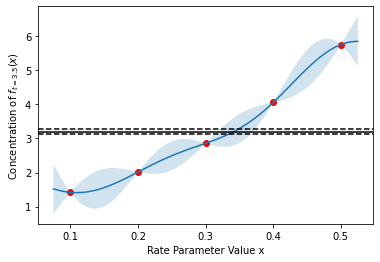

In [7]:
fig, ax = plt.subplots()
ax.scatter(x_train, y_train, color='red')
ax.fill_between(x_test, mu.ravel() + 3*sd, mu.ravel() - 3*sd, alpha=0.2)
ax.plot(x_test, mu)
ax.set_xlabel('Rate Parameter Value x')
ax.set_ylabel('Concentration of $f_{t=3.5}(x)$')
    
ax.axhline(z, color='black', label='Observed Data')
ax.axhline(z-(3*sigma_e), linestyle='dashed', color='black', label='$\pm 3 \sigma_{e}$')
ax.axhline(z+(3*sigma_e), linestyle='dashed', color='black')